# 로지스틱 회귀 (LogisticRegression)
- 선형회귀 알고리즘을 이용한 이진 분류 모델
- Sample이 특정 클래스에 속할 확률을 추정한다.    
    

## 확률 추정
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.


$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive의\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

><span style='background-color:#fff5b1'>**- w의 값과 b의 값(파라미터)로 인해 확률추정 값이 정해진다.**</span>

### <span style='background-color:#fff5b1'>로지스틱 함수
- <span style='background-color:#fff5b1'>**0과 1사이의 실수를 반환한다.** 
- S 자 형태의 결과를 내는<span style='background-color:#fff5b1'> **시그모이드 함수(sigmoid function)**</span> 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 샘플 **x**가 양성에 속할 확률

$$
\hat{y} = \begin{cases} 0\quad\hat{p}<0.5\\1\quad\hat{p}\geqq0.5 \end{cases}
$$

##### logistic 함수 시각화

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

In [2]:
y

array([4.53978687e-05, 4.63158512e-05, 4.72523952e-05, 4.82078759e-05,
       4.91826763e-05, 5.01771869e-05, 5.11918062e-05, 5.22269408e-05,
       5.32830055e-05, 5.43604233e-05, 5.54596260e-05, 5.65810541e-05,
       5.77251568e-05, 5.88923926e-05, 6.00832291e-05, 6.12981436e-05,
       6.25376227e-05, 6.38021631e-05, 6.50922714e-05, 6.64084646e-05,
       6.77512700e-05, 6.91212255e-05, 7.05188801e-05, 7.19447937e-05,
       7.33995376e-05, 7.48836947e-05, 7.63978594e-05, 7.79426385e-05,
       7.95186509e-05, 8.11265279e-05, 8.27669137e-05, 8.44404654e-05,
       8.61478535e-05, 8.78897620e-05, 8.96668888e-05, 9.14799456e-05,
       9.33296589e-05, 9.52167696e-05, 9.71420337e-05, 9.91062223e-05,
       1.01110122e-04, 1.03154537e-04, 1.05240284e-04, 1.07368200e-04,
       1.09539136e-04, 1.11753963e-04, 1.14013568e-04, 1.16318855e-04,
       1.18670749e-04, 1.21070190e-04, 1.23518141e-04, 1.26015581e-04,
       1.28563510e-04, 1.31162951e-04, 1.33814942e-04, 1.36520547e-04,
      

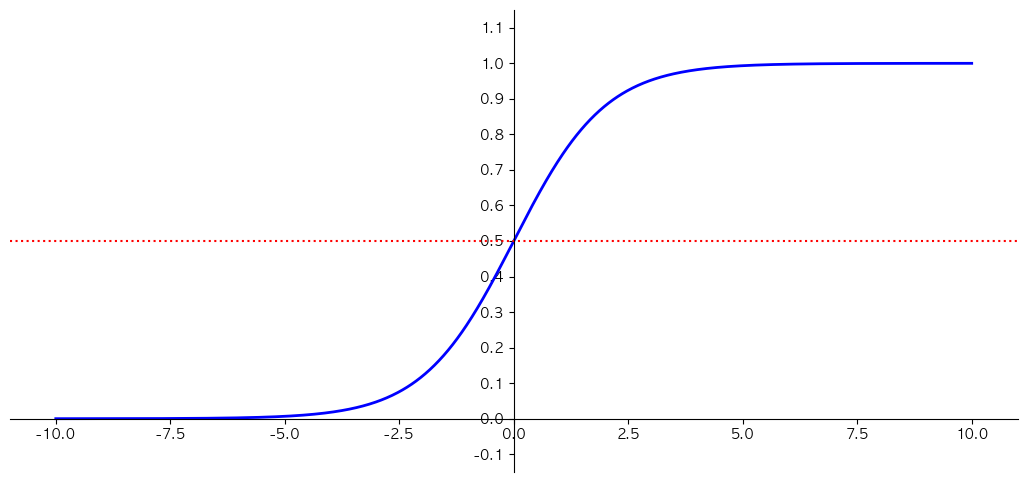

In [3]:
plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

plt.axhline(y=0.5, color='r', linestyle=':')

plt.ylim(-0.15, 1.15)
plt.yticks(np.arange(-0.1,1.2,0.1))

ax = plt.gca()
ax.spines['left'].set_position("center")      # 왼쪽 라인을 중앙선으로 보이게 한다.
ax.spines['bottom'].set_position(('data', 0)) # bottom라인이 data 값 기준으로 '0' 인 곳에 위치해라.
ax.spines['top'].set_visible(False)      # .set_visible 나올까 말까 임.
ax.spines['right'].set_visible(False)
plt.show()

In [4]:
np.min(y), np.max(y) # 0 과 1은 되지 않는다.

(4.5397868702434395e-05, 0.9999546021312976)

## LogisticRegression의 손실 함수(Loss Function)
- <span style='background-color:#fff5b1'>**Cross Entropy(로그손실-log loss)**</span>
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.


$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$


- <span style='background-color:#fff5b1'>**Binary Cross Entropy**</span>
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 정의한 것이 binary cross entropy이다.
$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- <span style='background-color:#fff5b1'>**y(실제값) 이 1인 경우**</span> $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- <span style='background-color:#fff5b1'>**y가 0인 경우**</span> $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [5]:
np.log(10) # 밑: e

2.302585092994046

In [6]:
np.log(1)

0.0

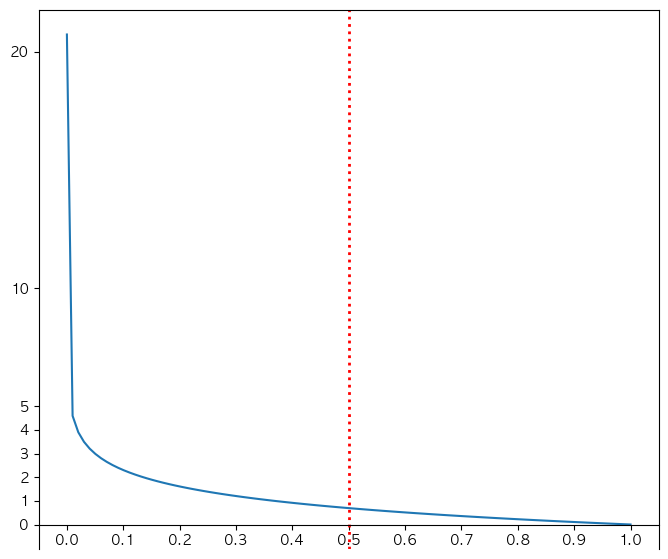

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(8,7))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])
plt.gca().spines['bottom'].set_position(("data", 0))
plt.show()

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에<span style='background-color:#fff5b1'> **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**</span>
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

## LogisticRegression 주요 하이퍼파라미터
- penalty: 과적합을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none' 
- C: 규제강도(기본값 1) - 작을 수록 규제가 강하다(단순).
- max_iter(기본값 100) : 경사하강법 반복횟수

In [ ]:
overfiting 발생 => 규제강도 크게
underifting 발생 => 규제강도 작게ㅡ

## 예제

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from metrics import print_metrics_classification as pmc, print_metrics_classification2 as pmc2

In [10]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)


##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습, 추론, 평가

In [12]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [13]:
lr.coef_

array([[-0.54384088, -0.34034271, -0.49560632, -0.56663005, -0.05559393,
         0.3999005 , -0.80734348, -1.10605291,  0.02920742,  0.40610307,
        -1.21922963, -0.13909852, -0.51970089, -0.76005919, -0.21510325,
         0.69981736,  0.02923076, -0.35243416,  0.47310794,  0.55701021,
        -0.99402288, -1.10967269, -0.77768019, -0.87390453, -0.46969384,
        -0.13650097, -0.68987558, -0.91744655, -0.70517455, -0.74475703]])

In [14]:
lr.intercept_

array([0.33121447])

In [18]:
train_pred = lr.predict(X_train_scaled)
test_pred = lr.predict(X_test_scaled)

pmc(y_train, train_pred, "Train set")
pmc(y_test, test_pred, '---------- Test set ---------- ')

Train set
정확도(accuracy): 0.9906103286384976
재현율/민감도(recall): 0.9962546816479401
정밀도(precision): 0.9888475836431226
F1-score: 0.9925373134328358
---------- Test set ---------- 
정확도(accuracy): 0.958041958041958
재현율/민감도(recall): 0.9666666666666667
정밀도(precision): 0.9666666666666667
F1-score: 0.9666666666666667


In [19]:
train_proba = lr.predict_proba(X_train_scaled)
test_proba = lr.predict_proba(X_test_scaled)

In [21]:
pmc2(y_train, train_proba[:, 1], '------------train set')
pmc2(y_test, test_proba[:, 1], '--------------test set')

------------train set
Average Precision: 0.9985900639964462
roc_auc: 0.9979271194026335
--------------test set
Average Precision: 0.9971317270472638
roc_auc: 0.9951781970649896


##### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [32]:
LogisticRegression?

In [33]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10]
    
}

gs = GridSearchCV(LogisticRegression(random_state = 0, solver = 'liblinear'),
                 params,
                 scoring = ['accuracy', 'recall', 'precision'],
                  refit = 'accuracy',
                 cv = 4,
                 n_jobs = -1)

gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'penalty': ['l1', 'l2']},
             refit='accuracy', scoring=['accuracy', 'recall', 'precision'])

In [34]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [35]:
gs.best_score_

0.9813084112149533

In [36]:
import pandas as pd
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_recall').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision
3,0.001742,0.000132,0.001631,0.000056,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953271,0.971963,1.000000,...,0.992537,0.007463,1,0.942857,0.970588,1.000000,1.000000,0.978361,0.023756,1
5,0.001928,0.000099,0.001570,0.000017,1,l2,"{'C': 1, 'penalty': 'l2'}",0.953271,0.971963,0.990566,...,0.992537,0.007463,1,0.942857,0.970588,0.985294,0.970588,0.967332,0.015353,4
4,0.001663,0.000281,0.001540,0.000033,1,l1,"{'C': 1, 'penalty': 'l1'}",0.943925,0.962617,0.981132,...,0.985075,0.010554,3,0.929577,0.970149,0.985075,0.970588,0.963847,0.020677,5
7,0.002191,0.000085,0.001582,0.000082,5,l2,"{'C': 5, 'penalty': 'l2'}",0.925234,0.971963,0.981132,...,0.985075,0.018280,3,0.927536,0.970588,0.971014,0.970588,0.959932,0.018704,8
6,0.002033,0.000305,0.001517,0.000040,5,l1,"{'C': 5, 'penalty': 'l1'}",0.915888,0.971963,0.971698,...,0.981343,0.024468,5,0.926471,0.970588,0.957143,0.970588,0.956197,0.018019,10
